In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
Xitun = df['SiteName'].isin(['西屯']) #找西屯測站
df[Xitun]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
14086,15077,西屯,臺中市,146.0,細懸浮微粒,對敏感族群不良,2.5,1.09,1.1,3.2,...,87.0,56.0,29.0,71.0,41.0,0.5,200.0,2017/1/8 03:00,98.0,53.0
14162,15153,西屯,臺中市,145.0,細懸浮微粒,對敏感族群不良,1.7,0.8,1.1,3.1,...,73.0,48.0,24.0,39.0,15.0,0.5,193.0,2017/1/8 04:00,94.0,53.0
14238,15229,西屯,臺中市,140.0,細懸浮微粒,對敏感族群不良,1.7,0.8,1.1,2.9,...,65.0,38.0,23.0,49.0,26.0,0.5,13.0,2017/1/8 05:00,89.0,50.0
14314,15305,西屯,臺中市,130.0,細懸浮微粒,對敏感族群不良,1.6,0.64,1.1,3.1,...,47.0,32.0,21.0,42.0,21.0,0.5,14.0,2017/1/8 06:00,80.0,47.0
14390,15381,西屯,臺中市,120.0,細懸浮微粒,對敏感族群不良,1.2,0.69,1.0,3.5,...,44.0,30.0,19.0,41.0,23.0,0.5,120.0,2017/1/8 07:00,73.0,43.0
14466,15457,西屯,臺中市,111.0,細懸浮微粒,對敏感族群不良,1.3,0.49,0.9,6.4,...,36.0,27.0,18.0,38.0,20.0,1.8,47.0,2017/1/8 08:00,65.0,39.0
14542,15533,西屯,臺中市,104.0,細懸浮微粒,對敏感族群不良,1.8,0.32,0.8,22,...,38.0,26.0,13.0,20.0,6.9,2.2,36.0,2017/1/8 09:00,59.0,37.0
14618,15609,西屯,臺中市,99.0,細懸浮微粒,普通,2.0,0.28,0.6,27,...,41.0,26.0,12.0,19.0,7.2,3.2,327.0,2017/1/8 10:00,55.0,35.0
14694,15685,西屯,臺中市,98.0,細懸浮微粒,普通,2.0,0.28,0.5,28,...,46.0,34.0,13.0,22.0,8.8,3.8,338.0,2017/1/8 11:00,53.0,34.0
14770,15761,西屯,臺中市,97.0,細懸浮微粒,普通,1.4,0.27,0.5,37,...,56.0,34.0,9.0,15.0,6.2,3.2,40.0,2017/1/8 12:00,53.0,34.0


In [4]:
Xitun = df['SiteName'].isin(['西屯']) #找西屯測站
Xitun=df[Xitun].fillna(method='ffill').drop(columns=['NOx','SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG']).reset_index(drop=True)
#只留下SiteName PM25 column

Xitun

,SO2,CO,O3,PM10,PM25,NO2,NO
0,2.5,1.09,3.2,87.0,56.0,29.0,41.0
1,1.7,0.8,3.1,73.0,48.0,24.0,15.0
2,1.7,0.8,2.9,65.0,38.0,23.0,26.0
3,1.6,0.64,3.1,47.0,32.0,21.0,21.0
4,1.2,0.69,3.5,44.0,30.0,19.0,23.0
5,1.3,0.49,6.4,36.0,27.0,18.0,20.0
6,1.8,0.32,22,38.0,26.0,13.0,6.9
7,2.0,0.28,27,41.0,26.0,12.0,7.2
8,2.0,0.28,28,46.0,34.0,13.0,8.8
9,1.4,0.27,37,56.0,34.0,9.0,6.2


In [5]:
Xitun=Xitun.astype(float)
cd4 = Xitun['PM10']>150
#Xitun['PM10']=Xitun['PM10'].astype("int")
#Xitun['PM10']=Xitun['PM10'].apply(lambda x: [y if y <= 200 else np.nan for y in x])
Xitun[cd4]

,SO2,CO,O3,PM10,PM25,NO2,NO
6684,6.3,1.02,18.0,156.0,86.0,41.0,1.2
6685,7.7,1.12,5.1,165.0,87.0,58.0,9.3
7496,4.5,0.76,50.0,161.0,89.0,29.0,1.0
7497,6.7,0.81,42.0,177.0,110.0,32.0,0.9
7498,6.1,0.86,36.0,195.0,117.0,33.0,0.9
7499,4.1,1.00,16.0,194.0,128.0,44.0,1.4
7500,4.3,0.96,14.0,188.0,115.0,37.0,1.3
7501,4.4,1.14,5.7,171.0,107.0,46.0,16.0
7502,3.1,1.10,3.6,168.0,102.0,44.0,15.0
7503,2.7,1.10,3.7,158.0,101.0,39.0,17.0


In [6]:
#將0全部改為空值
Xitun['CO'].replace(7.29,np.nan, inplace=True)
Xitun['SO2'].replace(69.0,np.nan, inplace=True)
Xitun.replace({0:np.nan,0.0:np.nan}, inplace=True)
Xitun

,SO2,CO,O3,PM10,PM25,NO2,NO
0,2.5,1.09,3.2,87.0,56.0,29.0,41.0
1,1.7,0.80,3.1,73.0,48.0,24.0,15.0
2,1.7,0.80,2.9,65.0,38.0,23.0,26.0
3,1.6,0.64,3.1,47.0,32.0,21.0,21.0
4,1.2,0.69,3.5,44.0,30.0,19.0,23.0
5,1.3,0.49,6.4,36.0,27.0,18.0,20.0
6,1.8,0.32,22.0,38.0,26.0,13.0,6.9
7,2.0,0.28,27.0,41.0,26.0,12.0,7.2
8,2.0,0.28,28.0,46.0,34.0,13.0,8.8
9,1.4,0.27,37.0,56.0,34.0,9.0,6.2


In [7]:
Xitun.fillna(method='ffill', inplace=True) #以前面數字來取代0值

Xitun

,SO2,CO,O3,PM10,PM25,NO2,NO
0,2.5,1.09,3.2,87.0,56.0,29.0,41.0
1,1.7,0.80,3.1,73.0,48.0,24.0,15.0
2,1.7,0.80,2.9,65.0,38.0,23.0,26.0
3,1.6,0.64,3.1,47.0,32.0,21.0,21.0
4,1.2,0.69,3.5,44.0,30.0,19.0,23.0
5,1.3,0.49,6.4,36.0,27.0,18.0,20.0
6,1.8,0.32,22.0,38.0,26.0,13.0,6.9
7,2.0,0.28,27.0,41.0,26.0,12.0,7.2
8,2.0,0.28,28.0,46.0,34.0,13.0,8.8
9,1.4,0.27,37.0,56.0,34.0,9.0,6.2


In [8]:
Xitun['pr']=''
Xitun.drop([ 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,12372,12371],inplace=True)
Xitun.reset_index(drop=True,inplace=True)

Xitun.to_csv('Xitunpollution.csv')

Xitun

,SO2,CO,O3,PM10,PM25,NO2,NO,pr
0,1.4,0.55,8.6,35.0,26.0,19.0,4.6,
1,2.2,0.52,7.5,33.0,16.0,17.0,4.2,
2,0.8,0.44,31.0,14.0,12.0,8.4,4.2,
3,1.6,0.42,30.0,12.0,9.0,8.4,4.2,
4,1.4,0.45,32.0,17.0,14.0,7.5,-0.3,
5,1.2,0.44,33.0,11.0,11.0,7.3,-0.2,
6,1.4,0.46,31.0,18.0,14.0,8.8,-0.2,
7,1.7,0.56,25.0,22.0,3.0,15.0,1.0,
8,1.4,0.51,28.0,36.0,13.0,15.0,1.0,
9,2.0,0.47,30.0,36.0,17.0,11.0,2.7,


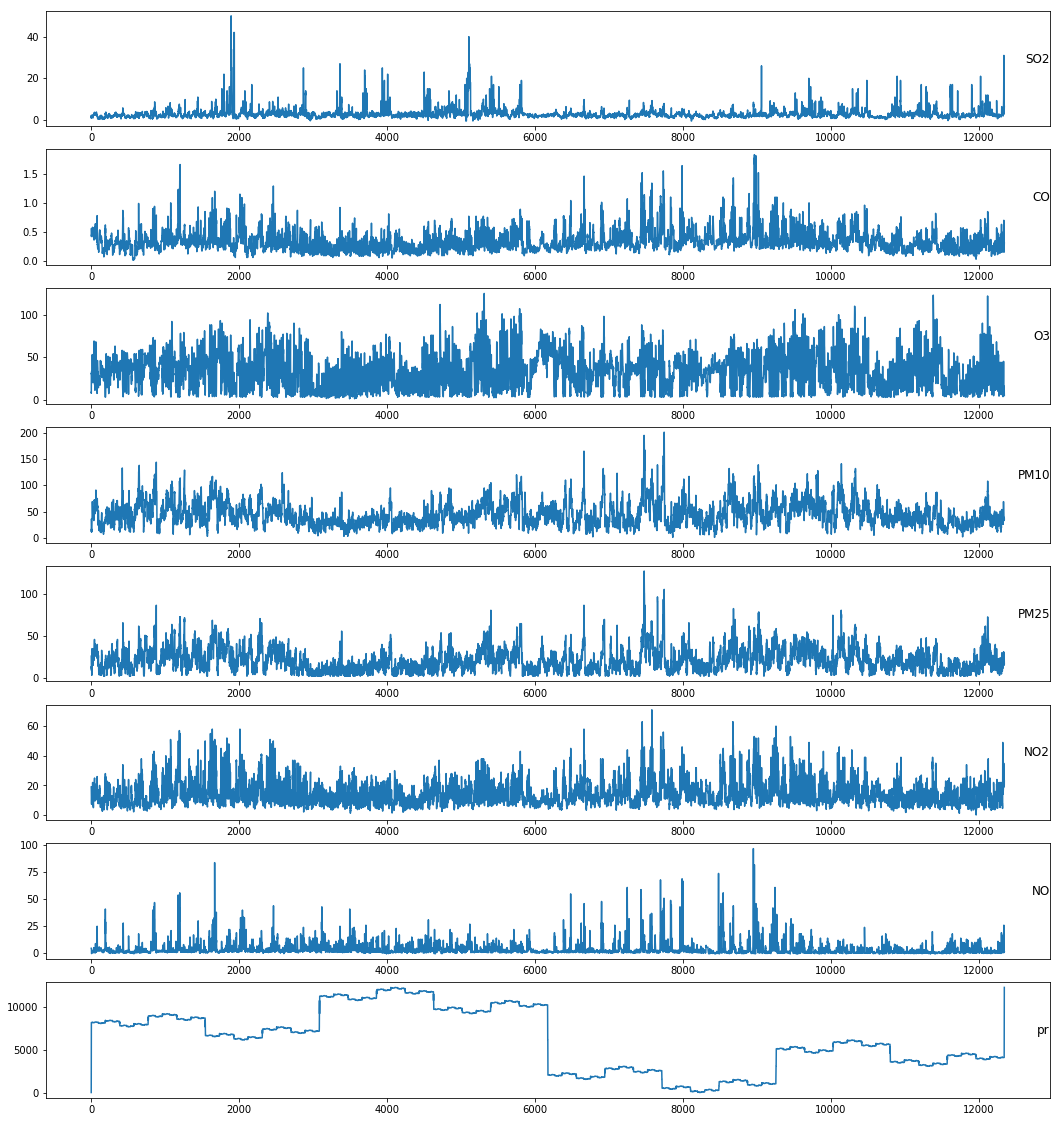

In [9]:
# load dataset
dataset =pd.read_csv('Xitunpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,7] = encoder.fit_transform(values[:,7])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4,5,6,7]
i=1
plt.figure(figsize=(18,20)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [10]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

,SO2,CO,O3,PM10,PM25,NO2,NO,pr
0,-0.554412,1.217224,-1.129034,-0.464593,0.346330,0.500456,0.239632,26.0
1,-0.257168,1.047984,-1.182369,-0.552485,-0.382383,0.262134,0.169068,16.0
2,-0.777345,0.596676,-0.042943,-1.387465,-0.673868,-0.762650,0.169068,12.0
3,-0.480101,0.483849,-0.091429,-1.475358,-0.892482,-0.762650,0.169068,9.0
4,-0.554412,0.653090,0.005543,-1.255626,-0.528125,-0.869895,-0.624772,14.0
5,-0.628723,0.596676,0.054029,-1.519304,-0.746739,-0.893727,-0.607131,11.0
6,-0.554412,0.709503,-0.042943,-1.211680,-0.528125,-0.714986,-0.607131,14.0
7,-0.442945,1.273638,-0.333860,-1.035895,-1.329709,0.023812,-0.395440,3.0
8,-0.554412,0.991570,-0.188402,-0.420646,-0.600996,0.023812,-0.395440,13.0
9,-0.331479,0.765917,-0.091429,-0.420646,-0.309511,-0.452832,-0.095545,17.0


In [11]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 



In [12]:
#將次序打亂 資料亂序 將資料打散，而非照日期排序
#def shuffle(X,Y):
#    np.random.seed(10)
#    randomList = np.arange(X.shape[0])
#    np.random.shuffle(randomList)
#   return X[randomList], Y[randomList]

In [13]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data
def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [14]:
#model
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

Instructions for updating:
Colocations handled automatically by placer.


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 7))`
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                18432     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

Epoch 58/500
9988/9988 [==============================] - 3s 260us/step - loss: 71.4461 - val_loss: 63.0195
Epoch 59/500
9988/9988 [==============================] - 3s 251us/step - loss: 71.2940 - val_loss: 62.7112
Epoch 60/500
9988/9988 [==============================] - 2s 249us/step - loss: 70.8599 - val_loss: 63.3798
Epoch 61/500
9988/9988 [==============================] - 3s 251us/step - loss: 71.6245 - val_loss: 62.9650
Epoch 62/500
9988/9988 [==============================] - 3s 251us/step - loss: 70.1960 - val_loss: 62.5774
Epoch 63/500
9988/9988 [==============================] - 2s 249us/step - loss: 69.9430 - val_loss: 64.2086
Epoch 64/500
9988/9988 [==============================] - 2s 249us/step - loss: 70.9716 - val_loss: 61.8440
Epoch 65/500
9988/9988 [==============================] - 3s 253us/step - loss: 69.6935 - val_loss: 61.8243
Epoch 66/500
9988/9988 [==============================] - 3s 258us/step - loss: 69.6651 - val_loss: 62.4993
Epoch 67/500
9988/9988 [====

9988/9988 [==============================] - 3s 260us/step - loss: 54.5023 - val_loss: 50.4558
Epoch 134/500
9988/9988 [==============================] - 2s 250us/step - loss: 53.1775 - val_loss: 50.8840
Epoch 135/500
9988/9988 [==============================] - 2s 242us/step - loss: 52.9706 - val_loss: 50.3852
Epoch 136/500
9988/9988 [==============================] - 3s 250us/step - loss: 53.3894 - val_loss: 51.0856
Epoch 137/500
9988/9988 [==============================] - 3s 256us/step - loss: 52.6843 - val_loss: 50.3462
Epoch 138/500
9988/9988 [==============================] - 3s 262us/step - loss: 53.5944 - val_loss: 49.9838
Epoch 139/500
9988/9988 [==============================] - 2s 243us/step - loss: 52.9803 - val_loss: 50.0144
Epoch 140/500
9988/9988 [==============================] - 2s 243us/step - loss: 53.3676 - val_loss: 51.4097
Epoch 141/500
9988/9988 [==============================] - 2s 243us/step - loss: 53.0540 - val_loss: 49.8831
Epoch 142/500
9988/9988 [========

9988/9988 [==============================] - 2s 242us/step - loss: 45.9509 - val_loss: 44.2524
Epoch 209/500
9988/9988 [==============================] - 2s 248us/step - loss: 45.4995 - val_loss: 44.9325
Epoch 210/500
9988/9988 [==============================] - 2s 243us/step - loss: 46.0582 - val_loss: 44.0763
Epoch 211/500
9988/9988 [==============================] - 2s 240us/step - loss: 45.7378 - val_loss: 45.0305
Epoch 212/500
9988/9988 [==============================] - 2s 249us/step - loss: 45.5452 - val_loss: 44.6422
Epoch 213/500
9988/9988 [==============================] - 2s 246us/step - loss: 45.5503 - val_loss: 44.0128
Epoch 214/500
9988/9988 [==============================] - 3s 251us/step - loss: 45.1314 - val_loss: 42.9866
Epoch 215/500
9988/9988 [==============================] - 2s 247us/step - loss: 45.4702 - val_loss: 44.1568
Epoch 216/500
9988/9988 [==============================] - 2s 250us/step - loss: 45.6421 - val_loss: 44.5732
Epoch 217/500
9988/9988 [========

9988/9988 [==============================] - 2s 161us/step - loss: 41.7810 - val_loss: 40.5376
Epoch 284/500
9988/9988 [==============================] - 2s 155us/step - loss: 41.3944 - val_loss: 41.1328
Epoch 285/500
9988/9988 [==============================] - 2s 153us/step - loss: 41.6663 - val_loss: 40.7522
Epoch 286/500
9988/9988 [==============================] - 1s 146us/step - loss: 41.6540 - val_loss: 42.2626
Epoch 287/500
9988/9988 [==============================] - 1s 130us/step - loss: 41.3458 - val_loss: 39.8449
Epoch 288/500
9988/9988 [==============================] - 1s 115us/step - loss: 41.3840 - val_loss: 40.4266
Epoch 289/500
9988/9988 [==============================] - 1s 114us/step - loss: 41.9998 - val_loss: 40.4550
Epoch 290/500
9988/9988 [==============================] - 1s 116us/step - loss: 42.0240 - val_loss: 41.2224
Epoch 291/500
9988/9988 [==============================] - 1s 110us/step - loss: 41.5964 - val_loss: 40.1062
Epoch 292/500
9988/9988 [========

9988/9988 [==============================] - 1s 111us/step - loss: 39.3129 - val_loss: 37.8912
Epoch 359/500
9988/9988 [==============================] - 1s 110us/step - loss: 39.8178 - val_loss: 38.1267
Epoch 360/500
9988/9988 [==============================] - 1s 108us/step - loss: 38.3613 - val_loss: 38.0724
Epoch 361/500
9988/9988 [==============================] - 1s 111us/step - loss: 38.9525 - val_loss: 37.8818
Epoch 362/500
9988/9988 [==============================] - 1s 110us/step - loss: 38.9839 - val_loss: 38.4154
Epoch 363/500
9988/9988 [==============================] - 1s 112us/step - loss: 38.8347 - val_loss: 38.2700
Epoch 364/500
9988/9988 [==============================] - 1s 114us/step - loss: 38.9086 - val_loss: 38.9691
Epoch 365/500
9988/9988 [==============================] - 1s 111us/step - loss: 39.1861 - val_loss: 38.6418
Epoch 366/500
9988/9988 [==============================] - 1s 110us/step - loss: 38.5752 - val_loss: 39.2144
Epoch 367/500
9988/9988 [========

9988/9988 [==============================] - 1s 79us/step - loss: 37.1129 - val_loss: 36.9140
Epoch 434/500
9988/9988 [==============================] - 1s 83us/step - loss: 36.8613 - val_loss: 37.6449
Epoch 435/500
9988/9988 [==============================] - 1s 74us/step - loss: 36.9437 - val_loss: 36.4359
Epoch 436/500
9988/9988 [==============================] - 1s 74us/step - loss: 36.7762 - val_loss: 37.1511
Epoch 437/500
9988/9988 [==============================] - 1s 71us/step - loss: 37.2792 - val_loss: 37.6214
Epoch 438/500
9988/9988 [==============================] - 1s 83us/step - loss: 36.5438 - val_loss: 36.9559
Epoch 439/500
9988/9988 [==============================] - 1s 78us/step - loss: 37.0921 - val_loss: 36.9345
Epoch 440/500
9988/9988 [==============================] - 1s 77us/step - loss: 36.8019 - val_loss: 36.7334
Epoch 441/500
9988/9988 [==============================] - 1s 73us/step - loss: 36.8980 - val_loss: 37.0084
Epoch 442/500
9988/9988 [=================

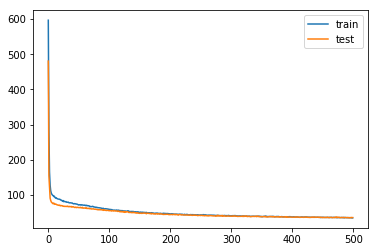

In [15]:
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 儲存model
model.save('Xitunmodel.h5')
del model

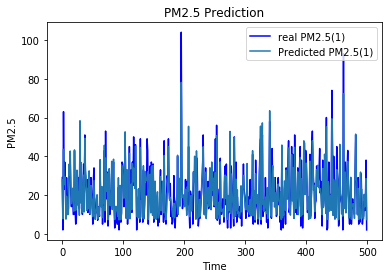

Train 0.3265453234817084
Validation 0.30008110300081103
1.1779469463549629e+44
The R2 score on the Test set is:	0.819
Train Score: 4.98 RMSE
Test Score: 5.87 RMSE
The MSE   on the Test set is: 34.45006408108743
The RMSE  on the Test set is: 5.869417695230714
The MAE   on the Test set is: 4.472500430599809
The MAPE  on the Test set is: 0.0309619079279723
The SMAPE on the Test set is: 0.02225627820104387


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


In [16]:
#讀取model3
model = load_model('Xitunmodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:500,1], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:500,1], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用



In [17]:
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((11098, 12, 7), (1233, 12, 7), (11098, 7), (1233, 7))

In [18]:
X_val[1]

array([[-0.10854538, -0.41876595, -1.21630907, -1.03589451, -1.32970944,
        -0.21450998,  0.66301338],
       [-0.07138982,  0.20178201, -1.28418975, -0.9919482 , -1.40258074,
         0.02381193,  1.89787598],
       [ 0.37447691, -0.19311215, -1.29388699, -0.86010928, -0.89248165,
         0.14297288,  1.89787598],
       [-0.14570094, -0.64441975, -1.21146045, -1.03589451, -0.96535295,
         0.02381193,  1.5450581 ],
       [ 0.04007686, -0.7008332 , -1.10963943, -1.47535757, -1.11109554,
         0.14297288,  1.36864915],
       [ 0.37447691, -0.75724665, -1.13873115, -1.07984081, -1.11109554,
         0.14297288,  0.83942232],
       [-0.03423426, -0.926487  , -1.14357977, -0.72827036, -0.89248165,
         0.14297288,  0.5748089 ],
       [-0.18285651, -0.8136601 , -1.17267149, -0.42064622, -1.25683814,
         0.14297288,  0.53952711],
       [ 0.04007686, -1.15214081, -0.57629125, -0.81616297, -0.96535295,
        -0.9175596 ,  0.09850475],
       [ 0.11438798, -0.5880